<a href="https://colab.research.google.com/github/kunalavghade/Machine-Learning/blob/main/ML_Practical_313057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Line Fitting

In [3]:
import pandas as pd
import numpy as np

## Import Data

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv")
df.head()

,83,234.289,235.6,159,107.608,1947,60.323
0,88.5,259.426,232.5,145.6,108.632,1948,61.122
1,88.2,258.054,368.2,161.6,109.773,1949,60.171
2,89.5,284.599,335.1,165.0,110.929,1950,61.187
3,96.2,328.975,209.9,309.9,112.075,1951,63.221
4,98.1,346.999,193.2,359.4,113.270,1952,63.639


## Convet pandas dataframe into numpy array

In [6]:
data = df.values
x = data[:,4]
y = data[:,-1] 
x,y

(array([108.632, 109.773, 110.929, 112.075, 113.27 , 115.094, 116.219,
        117.388, 118.734, 120.445, 121.95 , 123.366, 125.368, 127.852,
        130.081]),
 array([61.122, 60.171, 61.187, 63.221, 63.639, 64.989, 63.761, 66.019,
        67.857, 68.169, 66.513, 68.655, 69.564, 69.331, 70.551]))

## define function to calculate intercept and slope

In [8]:
def slope_intercept(x,y):
  slope = ((np.mean(x)*np.mean(y)) - np.mean(x*y))/((np.mean(x)*np.mean(x)) - np.mean(x*x))
  intercept = np.mean(y) - slope*np.mean(x)
  return [slope,intercept]


In [9]:
m, c = slope_intercept(x,y)
m, c

(0.48093826579213933, 8.861512409822794)

## Build Regrassion Line

In [10]:
# y = (m*x)+c
regression_line = [((m*i)+c) for i in x]
regression_line[0:10]

[61.10679809935448,
 61.6555486606233,
 62.211513295879016,
 62.76266854847681,
 63.33738977609841,
 64.21462117290326,
 64.75567672191943,
 65.31789355463044,
 65.96523646038666,
 66.78812183315702]

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style

## plote regression line and data samples

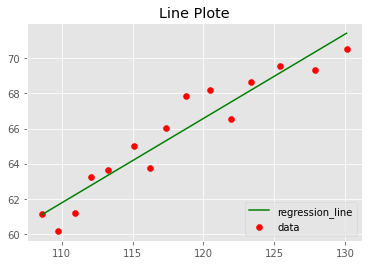

In [12]:
style.use('ggplot')
plt.scatter(x,y,color = "red",label="data")
plt.plot(x,regression_line,color = "green",label="regression_line")
plt.legend(loc=4)
plt.title("Line Plote")
plt.show()

## Predict the Value

In [13]:
px = 120
py = (m*px)+c
py

66.57410430487951

# 2. Linear Regrassion

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning and Normalization

In [17]:
data['Species'] =  pd.factorize(data['Species'])[0]+1
data.head(),data['Species'].value_counts()

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 0   1            5.1           3.5            1.4           0.2        1
 1   2            4.9           3.0            1.4           0.2        1
 2   3            4.7           3.2            1.3           0.2        1
 3   4            4.6           3.1            1.5           0.2        1
 4   5            5.0           3.6            1.4           0.2        1,
 1    50
 2    50
 3    50
 Name: Species, dtype: int64)

In [18]:
data = data.values
x = data[:,4]
y = data[:,5]
x,y

(array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
        1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
        1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
        1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
        1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
        2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
        2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
        1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
        2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,


## Split data for Training and Testing

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
x_test,y_test

(array([2.4, 1. , 0.2, 1.8, 0.2, 2.5, 0.3, 1.5, 1.4, 1.3, 1.4, 1.5, 1.2,
        1.5, 1.4, 0.1, 1.5, 1.2, 0.3, 0.4, 2. , 1.5, 0.2, 0.2, 1.8, 0.2,
        0.4, 1.3, 1. , 0.4]),
 array([3., 2., 1., 3., 1., 3., 1., 2., 2., 2., 3., 2., 2., 2., 2., 1., 2.,
        2., 1., 1., 3., 2., 1., 1., 3., 1., 1., 2., 2., 1.]))

## Creat Model and fit the data

In [20]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_dim=1),tf.keras.layers.Dense(10,activation=tf.nn.sigmoid),tf.keras.layers.Dense(1)])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=tf.keras.losses.mean_squared_error,metrics=[tf.keras.metrics.MeanSquaredError()])

In [23]:
model.fit(x_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 6ms/step - loss: 1.1479 - mean_squared_error: 1.1479
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4609 - mean_squared_error: 0.4609
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3431 - mean_squared_error: 0.3431
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1401 - mean_squared_error: 0.1401
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1143 - mean_squared_error: 0.1143
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0863 - mean_squared_error: 0.0863
Epoch 9/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 10/1000
4/4 [=========

## Evaluate the Model

In [24]:
model.evaluate(x_test,y_test,verbose=1)

1/1 [==============================] - 0s 221ms/step - loss: 0.0348 - mean_squared_error: 0.0348


[0.03480776399374008, 0.03480776399374008]

## Pradict The Output

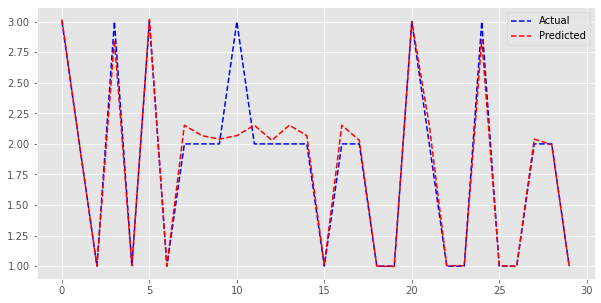

In [25]:
y_pred = model.predict(x_test);
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(x_test),1),y_test,'b--',label='Actual')
plt.plot(np.arange(0,len(x_test),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()

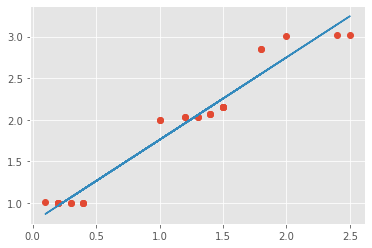

In [26]:
plt. plot(x_test,y_pred, 'o')
m, b = np. polyfit(x_test,y_pred, 1) 
plt. plot(x_test, m*x_test + b)

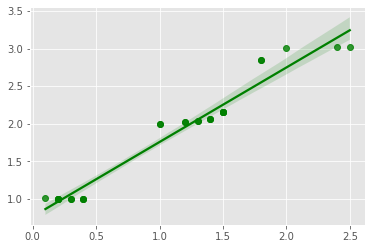

In [27]:
import seaborn as sns
#sns.set_theme(color_codes=True)
sns.regplot(x=x_test, y=y_pred, color="g")

# SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

## Cleaning And normalizing Data

In [ ]:
#Encoding the categorical column
data = data.replace({"Species":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


## Split Dataset for Train and Test

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,62,5.9,3.0,4.2,1.5
92,93,5.8,2.6,4.0,1.2
112,113,6.8,3.0,5.5,2.1
2,3,4.7,3.2,1.3,0.2
141,142,6.9,3.1,5.1,2.3
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


## Create and train Model

In [ ]:
from sklearn.svm import SVC
model =  SVC(kernel = "linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

### Predict the expexted values

In [ ]:
#predict the output
y_pred = model.predict(X_test)

## Validate Trained Model By confustion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# K Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preparing Dataset

In [14]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
x = data.iloc[:, [0, 1, 2, 3]].values
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# frequency distribution of species
iris_outcome = pd.crosstab(index=data['Species'],columns="count")
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Finding Optimal Number of clusters

### Elbow Methode

In [16]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter =300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

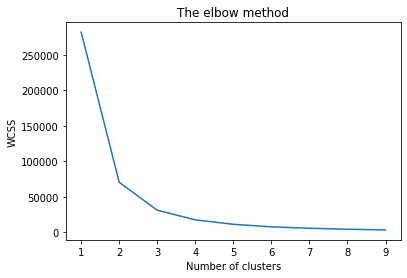

In [18]:
plt.plot(range(1,10),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### silhouette score method

In [24]:
from sklearn.metrics import silhouette_score
SS=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    labels = kmeans.labels_
    ss=silhouette_score(x,labels,metric='euclidean')
    SS.append(ss)

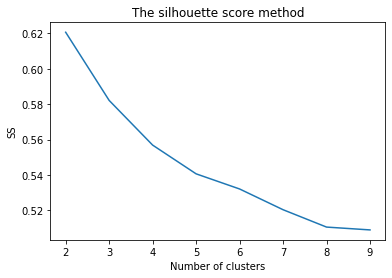

In [25]:
plt.plot(range(2, 10),SS)
plt.title('The silhouette score method')
plt.xlabel('Number of clusters')
plt.ylabel('SS') 
plt.show()

## Implementing K-Mean Clustering

In [28]:
kmeans = KMeans(n_clusters = 3 ,init='k-means++',n_init =10,max_iter=300,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising Clusters

In [ ]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label ="Iris-setosa" )
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='green',label ="Iris-versicolor" )
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='blue',label ="Iris-virgenica" )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

# Backpropogation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd